In [1]:
import os
import math
from typing import *

import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot
from tensorflow import keras 
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
neuroresults_random1=pd.read_csv('neuroresults_random1',sep="\t")
neuroresults_random2=pd.read_csv('neuroresults_random2',sep="\t")
neuroresults_random3=pd.read_csv('neuroresults_random3',sep="\t")
print(neuroresults_random1.shape)
print(neuroresults_random2.shape)
print(neuroresults_random3.shape)

(1043387, 42)
(1037730, 42)
(1037556, 42)


In [3]:
#Data preparation

print(neuroresults_random1.isnull().any().any())
print(neuroresults_random2.isnull().any().any())
print(neuroresults_random3.isnull().any().any())



False
False
False


In [4]:
neuroresults_random1.head(20)

,Experiment,Run,Subrun,Event,Track,nTracks,Expert,iNodes,oNodes,SL0-relID,...,SL7-alpha,SL8-relID,SL8-driftT,SL8-alpha,RecoZ,RecoTheta,ScaleZ,RawZ,ScaleTheta,RawTheta
0,20,738,0,13824,0,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.444756,1822,0.190575,781
1,20,738,0,13824,1,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.444756,1822,0.190575,781
2,20,738,0,13824,2,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.529239,2168,0.271151,1111
3,20,738,0,13824,3,5,0,27,2,0.000000,...,-0.159696,0.000000,0.000000,0.000000,0.555959,0.337421,0.267489,1096,-0.015505,-63
4,20,738,0,13824,4,5,0,27,2,0.000000,...,-0.159696,0.783737,0.000000,-0.178484,0.555959,0.337421,0.437675,1793,0.169821,696
5,20,738,0,36864,0,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.476010,1950,0.289952,1188
6,20,738,0,36864,1,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.538518,2206,0.370773,1519
7,20,738,0,36864,2,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.529239,2168,0.346112,1418
8,20,738,0,36864,3,5,3,27,2,0.000000,...,0.159696,-0.983748,0.000000,0.178484,0.555036,0.368713,0.426932,1749,0.287755,1179
9,20,738,0,36864,4,5,3,27,2,0.000000,...,0.159696,-0.983748,0.000000,0.178484,0.555036,0.368713,0.594677,2436,0.380784,1560


<AxesSubplot:>

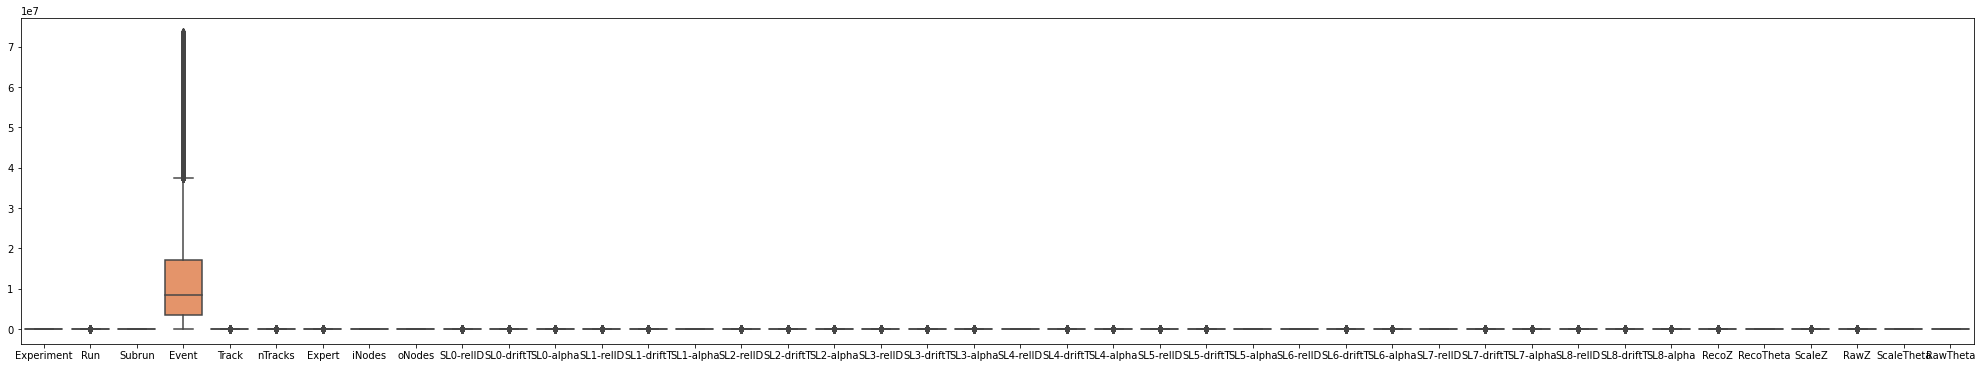

In [5]:
#so we have no nan values, now lets look at the data distribution 
plot_dims = (35, 6)
fig, ax = pyplot.subplots(figsize=plot_dims)
sns.boxplot(data=neuroresults_random1, ax=ax)


Build the Basic Model

In [27]:
from sklearn.utils import shuffle

inpval=['SL0-relID','SL0-driftT','SL0-alpha','SL1-relID','SL1-driftT','SL1-alpha','SL2-relID','SL2-driftT',
        'SL2-alpha','SL3-relID','SL3-driftT','SL3-alpha','SL4-relID','SL4-driftT','SL4-alpha','SL5-relID',
        'SL5-driftT','SL5-alpha','SL6-relID','SL6-driftT','SL6-alpha','SL7-relID','SL7-driftT','SL7-alpha',
        'SL8-relID','SL8-driftT','SL8-alpha']
outpval=['RecoZ','RecoTheta']
nrr1_basicmodel_X, nrr1_basicmodel_Y = shuffle(neuroresults_random1[inpval], neuroresults_random1[outpval])
print(nrr1_basicmodel_Y.shape)

(1043387, 2)


<AxesSubplot:>

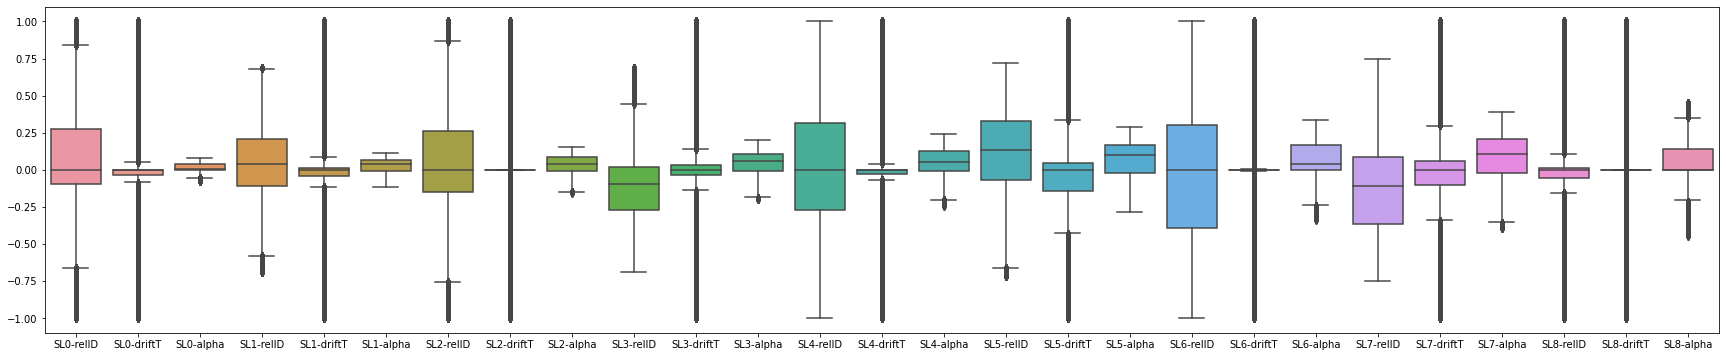

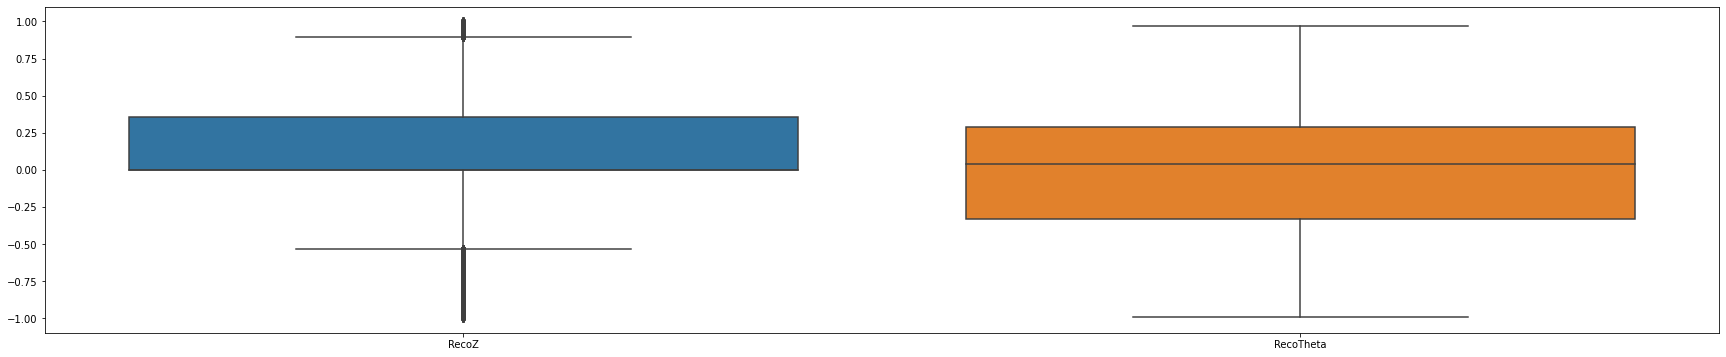

In [7]:
#so we have no nan values, now lets look at the data distribution 
plot_dims = (30, 6)
fig, ax1 = pyplot.subplots(figsize=plot_dims)
fig, ax2 = pyplot.subplots(figsize=plot_dims)
sns.boxplot(data=nrr1_basicmodel_X, ax=ax1)
sns.boxplot(data=nrr1_basicmodel_Y, ax=ax2)


We can see that the Data is already prepared. So lets look more into it

Text(0.5, 1.0, 'Correlation Heatmap')

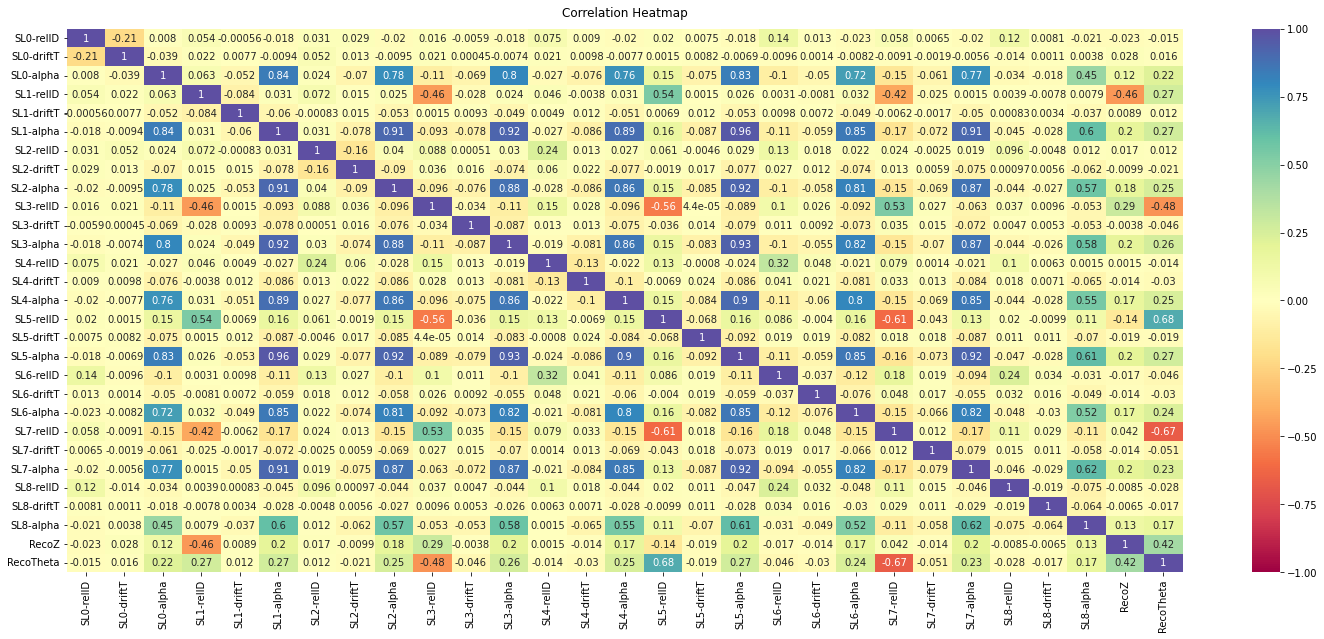

In [8]:
plt.figure(figsize=(25, 10))
variables = inpval+outpval
data = neuroresults_random1[variables]
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap="Spectral")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<function matplotlib.pyplot.show(close=None, block=None)>

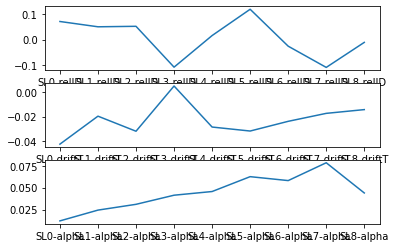

<Figure size 432x288 with 0 Axes>

In [9]:
rellDs=['SL0-relID','SL1-relID','SL2-relID','SL3-relID','SL4-relID','SL5-relID',
        'SL6-relID','SL7-relID','SL8-relID']
rellDsvals=neuroresults_random1[rellDs]
meanrellDsvals=rellDsvals.mean()
driftTs=['SL0-driftT','SL1-driftT','SL2-driftT','SL3-driftT','SL4-driftT','SL5-driftT',
         'SL6-driftT','SL7-driftT','SL8-driftT']
driftTsvals=neuroresults_random1[driftTs]
meandriftTsvals=driftTsvals.mean()
alphas=['SL0-alpha','SL1-alpha','SL2-alpha','SL3-alpha','SL4-alpha','SL5-alpha','SL6-alpha',
        'SL7-alpha','SL8-alpha']
alphasvals=neuroresults_random1[alphas]
meanalphasvals=alphasvals.mean()
figure, axis = plt.subplots(3, 1)
f = plt.figure()
axis[0].plot(meanrellDsvals)
axis[1].plot(meandriftTsvals)
axis[2].plot(meanalphasvals)
plt.show

mse_Z
0.04716335172413056
mse_Theta
0.05213072309190887
0.21372331498592262
0.22235462764842423


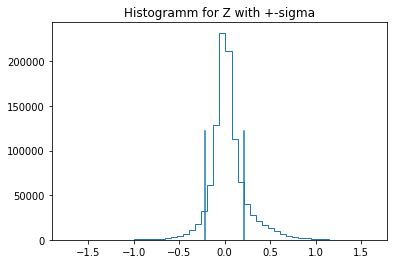

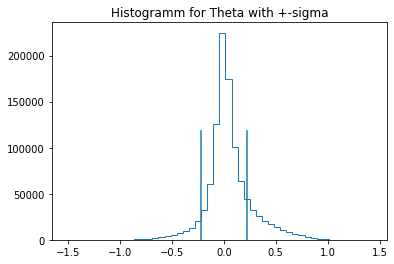

In [41]:
def plot_as_hist(df_pred_Z: pd.DataFrame, df_pred_Theta:pd.DataFrame,df_real_Z: pd.DataFrame, df_real_Theta: pd.DataFrame):

    mseZ=mean_squared_error(df_real_Z, df_pred_Z)
    mseTheta=mean_squared_error(df_real_Theta, df_pred_Theta)
    print('mse_Z')
    print(mseZ)
    print('mse_Theta')
    print(mseTheta)

    error_Z=df_real_Z-df_pred_Z
    error_Theta=df_real_Theta-df_pred_Theta

    sigma_Z=error_Z.std()
    sigma_Theta=error_Theta.std()
    
    print(sigma_Z)
    print(sigma_Theta)
    
    plt.axvline(x=-sigma_Z,ymin=0, ymax=0.5)
    plt.axvline(x=sigma_Z,ymin=0, ymax=0.5)
    plt.hist(error_Z, bins=50,histtype='step')
    plt.savefig('sigma_Z.png')
    plt.title('Histogramm for Z with +-sigma')
    plt.show()
    
    plt.axvline(x=-sigma_Theta,ymin=0, ymax=0.5)
    plt.axvline(x=sigma_Theta,ymin=0, ymax=0.5)
    plt.hist(error_Theta, bins=50,histtype='step')
    plt.savefig('sigma_Theta.png')
    plt.title('Histogramm for Theta with +-sigma')
    plt.show()
    

plot_as_hist(neuroresults_random1['ScaleZ'],neuroresults_random1['ScaleTheta'],neuroresults_random1['RecoZ'],neuroresults_random1['RecoTheta'])



In [11]:
nrr1_basicmodel_X_short=nrr1_basicmodel_X.iloc[0:100000]
nrr1_basicmodel_Y_short=nrr1_basicmodel_Y.iloc[0:100000]

# Start with Modeling

Searching for the best parameters

In [42]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.vis_utils import plot_model

In [ ]:
parameters = {'batch_size': [8,16,64,128]}

def create_model(): 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(81, input_dim=27, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    # compile the keras model
    model.compile(optimizer ='adam',loss='binary_crossentropy', metrics='accuracy')
    return model 

model = KerasClassifier(build_fn=create_model)
grid = GridSearchCV(estimator=model,param_grid=parameters,cv=5,verbose=0)
grid_result = grid.fit(nrr1_basicmodel_X_short,nrr1_basicmodel_Y_short,epochs=20)   

C:\Users\uhvmz\AppData\Local\Temp/ipykernel_20984/150887179.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/20
10000/10000 [==============================] - 6s 620us/step - loss: -0.6536 - accuracy: 0.8424
Epoch 2/20
10000/10000 [==============================] - 6s 627us/step - loss: -0.7096 - accuracy: 0.8597
Epoch 3/20
10000/10000 [==============================] - 6s 621us/step - loss: -0.7444 - accuracy: 0.8737
Epoch 4/20
10000/10000 [==============================] - 6s 625us/step - loss: -0.7619 - accuracy: 0.8736
Epoch 5/20
10000/10000 [==============================] - 6s 625us/step - loss: -0.7685 - accuracy: 0.8728
Epoch 6/20
10000/10000 [==============================] - 6s 626us/step - loss: -0.7625 - accuracy: 0.8659
Epoch 7/20
10000/10000 [==============================] - 6s 624us/step - loss: -0.7367 - accuracy: 0.8480
Epoch 8/20
10000/10000 [==============================] - 6s 628us/step - loss: -0.7810 - accuracy: 0.8763
Epoch 9/20
10000/10000 [==============================] - 6s 645us/step - loss: -0.7634 - accuracy: 0.8723
Epoch 10/20
10000/10000 [============

In [ ]:
print(grid_result.best_params_)
batch_size=grid_result.best_params_

build Kerasmodel

In [15]:
def create_and_train_model2layers():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(27, input_dim=27, activation='relu'))
    model.add(tf.keras.layers.Dense(81, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    # compile the keras model
    return model

In [19]:
model2layers=create_and_train_model2layers()
model2layers.summary()
plot_model(model2layers, to_file='model2layers_plot.png', show_shapes=True, show_layer_names=True)
model2layers.compile(optimizer ='adam',loss='binary_crossentropy', metrics='mse')
hist_model2layers=model2layers.fit(nrr1_basicmodel_X_short,nrr1_basicmodel_Y_short,epochs=30,batch_size=64) 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 27)                756       
                                                                 
 dense_7 (Dense)             (None, 81)                2268      
                                                                 
 dense_8 (Dense)             (None, 2)                 164       
                                                                 
Total params: 3,188
Trainable params: 3,188
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1563/1563 [==============================] - 1s 736us/step - loss: -0.5833 - mse: 0.0967
Epoch 2/30
1563/1563 [==============================] - 1s 674us/step - loss: -0.6999 - mse: 0.0913
Epoch 3/30
1563/1563 [==============================] - 1s 675us/step - loss: -0.6721 - mse: 0.0935
Epoch 4/30
1563/

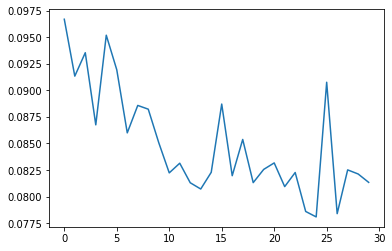

In [20]:
plt.plot(hist_model2layers.history['mse'])

# Pruning 

In [21]:
import os
import zipfile
import tensorflow as tf
import tensorflow_model_optimization as tfmot
from tensorflow.keras.models import load_model
from tensorflow import keras
%load_ext tensorboard

In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test  = train_test_split(nrr1_basicmodel_X_short, shuffle=False)
y_train, y_test = train_test_split(nrr1_basicmodel_Y_short, shuffle=False)

In [28]:
def create_model(): 

    inputs = keras.Input(shape=(27,), name="digits")
    x1 = keras.layers.Dense(81, activation="relu")(inputs)
    outputs = keras.layers.Dense(2, name="predictions")(x1)
    
    return keras.Model(inputs=inputs, outputs=outputs) 

In [29]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model1=create_model()
model1.summary()
model1.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])
hist_model1=model1.fit(x_train,y_train,epochs=50,validation_split=0.2,callbacks=early_stop,batch_size=64)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 27)]              0         
                                                                 
 dense_10 (Dense)            (None, 81)                2268      
                                                                 
 predictions (Dense)         (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 1s 886us/step - loss: 0.0548 - mae: 0.1739 - mse: 0.0548 - val_loss: 0.0497 - val_mae: 0.1617 - val_mse: 0.0497
Epoch 2/50
938/938 [==============================] - 1s 821us/step - loss: 0.0462 - mae: 0.1538 - mse: 0.0462 - val_loss: 0.0455 - val_mae: 0.1514 - val_m

KeyboardInterrupt: 

In [25]:
mod1_first_layer_weights = model1.layers[1].get_weights()[0]
mod1_first_layer_biases = model1.layers[1].get_weights()[1]
mod1_second_layer_weights = model1.layers[2].get_weights()[0]
mod1_second_layer_biases = model1.layers[2].get_weights()[1]

#print(mod1_first_layer_weights)
#print(mod1_first_layer_biases)
#print(mod1_second_layer_weights)
#print(mod1_second_layer_biases)
# count zeros in 2d array
n_zeros = np.count_nonzero(mod1_first_layer_weights==0)
# display the count of zeros
print(n_zeros)

0


In [96]:
score1 = model1.evaluate(x_test, y_test, verbose = 0) 
print(model1.metrics_names)
print(score1)

['loss', 'mae', 'mse']
[0.029257986694574356, 0.1057727262377739, 0.029257986694574356]


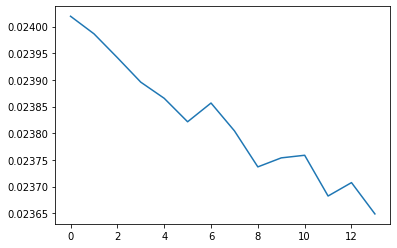

In [97]:
plt.plot(hist_model1.history['mse'])

0.17167201868285992


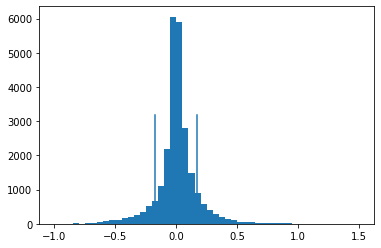

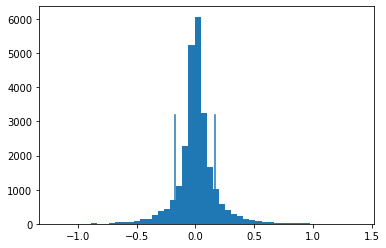

In [98]:
pred_model1=model1.predict(x_test)
error_model1=pred_model1-y_test

model1sigma_Z=error_model1['RecoZ'].std()
print(model1sigma_Z)

plt.axvline(x=-model1sigma_Z,ymin=0, ymax=0.5)
plt.axvline(x=model1sigma_Z,ymin=0, ymax=0.5)

plt.hist(error_model1['RecoZ'], bins=50)
plt.show()

model1sigma_Theta=error_model1['RecoTheta'].std()

plt.axvline(x=-model1sigma_Theta,ymin=0, ymax=0.5)
plt.axvline(x=model1sigma_Theta,ymin=0, ymax=0.5)

plt.hist(error_model1['RecoTheta'], bins=50)
plt.show()

In [81]:
from tensorflow_model_optimization.sparsity.keras import ConstantSparsity
pruning_params = {
    'pruning_schedule': ConstantSparsity(0.3, 0),
    'block_size': (1, 1),
    'block_pooling_type': 'AVG'
}

In [82]:
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude
from tensorflow_model_optimization.sparsity.keras import strip_pruning

model2=create_model()
model_to_prune = tfmot.sparsity.keras.prune_low_magnitude(
    model2, **pruning_params)

C:\tools\Anaconda3\envs\lama-wandb\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:212: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  mask = self.add_variable(
C:\tools\Anaconda3\envs\lama-wandb\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:219: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  threshold = self.add_variable(
C:\tools\Anaconda3\envs\lama-wandb\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:233: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.pruning_step = self.add_variable(


In [25]:
model_to_prune.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_5  (None, 200)              11002     
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_6  (None, 200)              80202     
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_7  (None, 2)                804       
  (PruneLowMagnitude)                                            
                                                                 
Total params: 92,008
Trainable params: 46,202
Non-trainable params: 45,806
_________________________________________________________________


In [26]:
model_to_prune.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
hist_model_to_prune=model_to_prune.fit(x_train,y_train,epochs=50,validation_split=0.2,callbacks=callbacks,batch_size=64)

Epoch 1/50
1875/1875 [==============================] - 4s 1ms/step - loss: 0.0915 - mae: 0.2245 - mse: 0.0915 - val_loss: 0.0899 - val_mae: 0.2169 - val_mse: 0.0899
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0874 - mae: 0.2149 - mse: 0.0874 - val_loss: 0.0878 - val_mae: 0.2141 - val_mse: 0.0878
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0800 - mae: 0.1992 - mse: 0.0800 - val_loss: 0.0691 - val_mae: 0.1720 - val_mse: 0.0691
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0665 - mae: 0.1690 - mse: 0.0665 - val_loss: 0.0689 - val_mae: 0.1725 - val_mse: 0.0689
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0655 - mae: 0.1664 - mse: 0.0655 - val_loss: 0.0682 - val_mae: 0.1695 - val_mse: 0.0682
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0649 - mae: 0.1649 - mse: 0.0649 - val_loss: 0.0677 - val_mae: 0.1680 - val_mse: 0.0677
Epoc

In [27]:
mod2_first_layer_weights = model_to_prune.layers[0].get_weights()[0]
mod2_first_layer_biases = model_to_prune.layers[0].get_weights()[1]
mod2_second_layer_weights = model_to_prune.layers[1].get_weights()[0]
mod2_second_layer_biases = model_to_prune.layers[1].get_weights()[1]

#print(mod2_first_layer_weights)
#print(mod2_first_layer_biases)
#print(mod2_second_layer_weights)
#print(mod2_second_layer_biases)#
#print((mod2_first_layer_weights[1]))

n_zerosmod2_first_layer_weights = np.count_nonzero(mod2_first_layer_weights==0)
layer_1_factor=n_zerosmod2_first_layer_weights/(model_to_prune.layers[0].count_params())
print(layer_1_factor)

n_zerosmod2_second_layer_weights = np.count_nonzero(mod2_second_layer_weights==0)
layer_2_factor=n_zerosmod2_second_layer_weights/(model_to_prune.layers[1].count_params())
print(layer_2_factor)


0.14724595528085802
0.14962220393506395


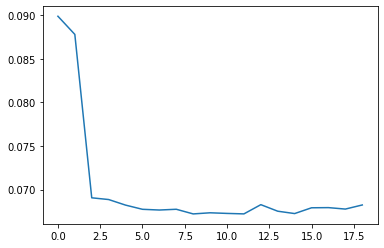

In [28]:
plt.plot(hist_model_to_prune.history['val_mse'])

2700 nutzlos -> 200*(1-(2700/11002)) neuronen ist guter nächster versuch -> 151 

20000 nutzlos -> 200*(1-(20000/80202)) neuronen nächster versuch -> 150

# optimized Model

In [35]:
def create_model2(): 

    # compile the keras model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(int(200*(1-layer_1_factor)), input_dim=27, activation='relu'))
    model.add(tf.keras.layers.Dense(int(200*(1-layer_2_factor)), activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    return model 

In [36]:
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude
from tensorflow_model_optimization.sparsity.keras import strip_pruning

model3=create_model2()
model_to_prune2 = tfmot.sparsity.keras.prune_low_magnitude(
    model3, **pruning_params)

In [37]:
model_to_prune2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_1  (None, 170)              9352      
 4 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 170)              57972     
 5 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 2)                684       
 6 (PruneLowMagnitude)                                           
                                                                 
Total params: 68,008
Trainable params: 34,172
Non-trainable params: 33,836
_________________________________________________________________


In [38]:
model_to_prune2.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune2.fit(x_train,y_train,epochs=50,validation_split=0.2,callbacks=callbacks)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0761 - mae: 0.1918 - mse: 0.0761 - val_loss: 0.0732 - val_mae: 0.1814 - val_mse: 0.0732
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0692 - mae: 0.1749 - mse: 0.0692 - val_loss: 0.0711 - val_mae: 0.1758 - val_mse: 0.0711
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - mae: 0.1702 - mse: 0.0672 - val_loss: 0.0698 - val_mae: 0.1725 - val_mse: 0.0698
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0663 - mae: 0.1680 - mse: 0.0663 - val_loss: 0.0685 - val_mae: 0.1708 - val_mse: 0.0685
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0655 - mae: 0.1660 - mse: 0.0655 - val_loss: 0.0679 - val_mae: 0.1697 - val_mse: 0.0679
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0649 - mae: 0.1649 - mse: 0.0649 - val_loss: 0.0685 - val_mae: 0.1702 - val_mse: 0.0685
Epoc

In [ ]:
mod3_first_layer_weights = model_to_prune2.layers[0].get_weights()[0]
mod3_first_layer_biases = model_to_prune2.layers[0].get_weights()[1]
mod3_second_layer_weights = model_to_prune2.layers[1].get_weights()[0]
mod3_second_layer_biases = model_to_prune2.layers[1].get_weights()[1]

#print(mod2_first_layer_weights)
#print(mod2_first_layer_biases)
#print(mod2_second_layer_weights)
#print(mod2_second_layer_biases)

n_zerosmod3_first_layer_weights = np.count_nonzero(mod3_first_layer_weights==0)
print(n_zerosmod3_first_layer_weights)

n_zerosmod3_first_layer_biases = np.count_nonzero(mod3_first_layer_biases==0)
print(n_zerosmod3_first_layer_biases)

n_zerosmod3_second_layer_weights = np.count_nonzero(mod3_second_layer_weights==0)
print(n_zerosmod3_second_layer_weights)

n_zerosmod3_second_layer_biases = np.count_nonzero(mod3_second_layer_biases==0)
print(n_zerosmod3_second_layer_biases)

# Hyperparameter Sweeps

In [53]:
%%capture
!pip install wandb

In [54]:
import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [55]:
import wandb
from wandb.keras import WandbCallback

wandb.login()

True

In [56]:
x_train , x_test  = train_test_split(nrr1_basicmodel_X_short, shuffle=False)
y_train, y_test = train_test_split(nrr1_basicmodel_Y_short, shuffle=False)
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(75000, 27)
(25000, 27)
(75000, 2)
(25000, 2)


In [57]:
def Model():
    inputs = keras.Input(shape=(27,), name="digits")
    x1 = keras.layers.Dense(81, activation="relu")(inputs)
    x2 = keras.layers.Dense(24, activation="relu")(x1)
    outputs = keras.layers.Dense(2, name="predictions")(x2)
    
    return keras.Model(inputs=inputs, outputs=outputs)

    
def train_step(x, y, model, optimizer, loss_fn, train_acc_metric):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    train_acc_metric.update_state(y, logits)


    return loss_value

    
def test_step(x, y, model, loss_fn, val_acc_metric):
    val_logits = model(x, training=False)
    loss_value = loss_fn(y, val_logits)
    val_acc_metric.update_state(y, val_logits)



    return loss_value

In [59]:
model4=Model()
model4.compile(optimizer ='adam',loss='mean_squared_error', metrics='mae')
model4.fit(x_train,y_train,epochs=20) 
score2 = model4.evaluate(x_test, y_test) 
print(model4.metrics_names)
print(score2)

Epoch 1/20
2344/2344 [==============================] - 2s 731us/step - loss: 0.0471 - mae: 0.1539 0s - loss: 0.051
Epoch 2/20
2344/2344 [==============================] - 2s 706us/step - loss: 0.0364 - mae: 0.1266
Epoch 3/20
2344/2344 [==============================] - 2s 723us/step - loss: 0.0332 - mae: 0.1186
Epoch 4/20
2344/2344 [==============================] - 2s 675us/step - loss: 0.0317 - mae: 0.1149
Epoch 5/20
2344/2344 [==============================] - 2s 685us/step - loss: 0.0307 - mae: 0.1125
Epoch 6/20
2344/2344 [==============================] - 2s 709us/step - loss: 0.0300 - mae: 0.1107
Epoch 7/20
2344/2344 [==============================] - 2s 701us/step - loss: 0.0296 - mae: 0.1095
Epoch 8/20
2344/2344 [==============================] - 2s 705us/step - loss: 0.0291 - mae: 0.1085
Epoch 9/20
2344/2344 [==============================] - 2s 694us/step - loss: 0.0288 - mae: 0.1077
Epoch 10/20
2344/2344 [==============================] - 2s 710us/step - loss: 0.0285 - mae:

In [13]:
# def Model():

#     #wandb.init(project="my-test-project", entity="uqetv",magic=True)

#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Dense(81, input_dim=27, activation='relu'))
#     model.add(tf.keras.layers.Dense(2, activation='relu'))
#     # compile the keras model
#     model.compile(optimizer ='adam',loss='binary_crossentropy', metrics='accuracy')
#     model.fit(nrr1_basicmodel_X_short,nrr1_basicmodel_Y_short,epochs=20) 

In [14]:
# sweep_config = {
#     'method': 'grid'
#     }
# parameters_dict = {
#     'optimizer': {
#         'values': ['adam']
#         },
#     'dropout': {
#           'values': [0.3,0.1, 0.2]
#         },
#     'batch_size':{
#         'values':[8,16,32]
#     }
#     }

# sweep_config['parameters'] = parameters_dict

In [19]:
# import wandb
# from wandb.keras import WandbCallback
# sweep_id = wandb.sweep(sweep_config)

In [18]:
# wandb.agent(sweep_id, function=train)